In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import chi2
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree

In [2]:
df = pd.read_csv("test_scores.csv")

In [3]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [4]:
df.shape

(2133, 11)

In [5]:
df.isna().mean()

school             0.0
school_setting     0.0
school_type        0.0
classroom          0.0
teaching_method    0.0
n_student          0.0
student_id         0.0
gender             0.0
lunch              0.0
pretest            0.0
posttest           0.0
dtype: float64

In [6]:
df.columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest', 'posttest'],
      dtype='object')

In [7]:
X = df[['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest']]
y = df.posttest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# EDA

In [8]:
X_train.school.value_counts()

QOQTS    127
GOOBU    119
GJJHK    101
UKPGS     99
CUQAM     95
VVTVA     94
ZOWMK     93
KZKKE     92
DNQDD     91
CCAAW     83
VKWQH     81
IDGFP     76
UAGPU     68
UUUQX     65
OJOBU     62
ZMNYA     61
CIMBB     55
GOKXL     55
LAYPA     41
KFZMY     41
FBUMG     37
VHDHF     36
ANKYI     34
Name: school, dtype: int64

<AxesSubplot:xlabel='school', ylabel='posttest'>

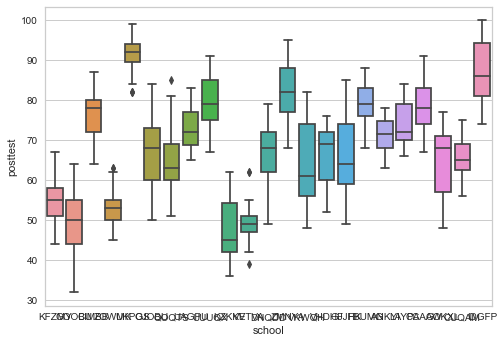

In [9]:
sns.boxplot(x = X_train.school, y = df.posttest)
#the school variable looks relevant...the score changes considerably depending on the school

In [10]:
X_train.school_setting.value_counts()

Urban       734
Suburban    568
Rural       404
Name: school_setting, dtype: int64

<AxesSubplot:xlabel='school_setting', ylabel='posttest'>

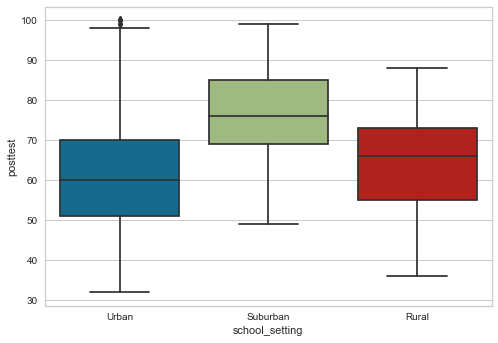

In [11]:
sns.boxplot(x = X_train.school_setting, y = y_train)
#the school setting variable looks relevant too .... the test score changes based on the value it has

In [12]:
X_train.school_type.value_counts()

Public        1279
Non-public     427
Name: school_type, dtype: int64

<AxesSubplot:xlabel='school_type', ylabel='posttest'>

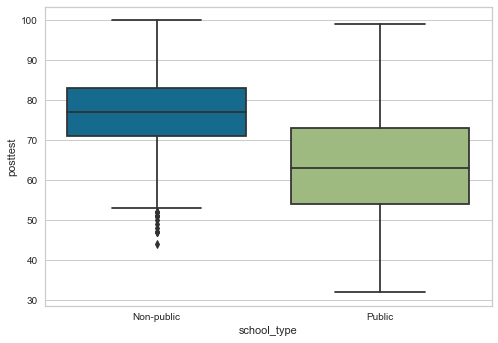

In [13]:
sns.boxplot(x = X_train.school_type, y = y_train)
#the school variable looks relevant... those attending non public schools seems to have better scores

#the information brought by this variable could be redundant ...the information could ge already be captured by the name of the school

In [14]:
X_train.classroom.value_counts()

QA2    27
NOR    27
1Q1    26
SUR    26
OMI    25
       ..
SSP    11
JGD    10
6C1    10
HUJ    10
KR1    10
Name: classroom, Length: 97, dtype: int64

<AxesSubplot:xlabel='classroom', ylabel='posttest'>

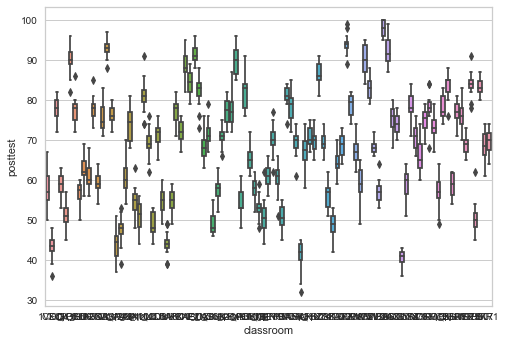

In [15]:
sns.boxplot(x = X_train.classroom, y = y_train)

In [16]:
X_train.teaching_method.value_counts()

Standard        1088
Experimental     618
Name: teaching_method, dtype: int64

<AxesSubplot:xlabel='teaching_method', ylabel='posttest'>

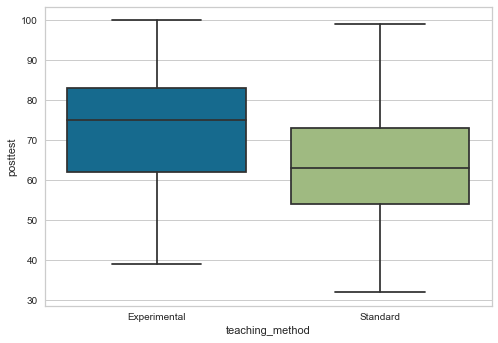

In [17]:
sns.boxplot(x = X_train.teaching_method, y = y_train)

#there seems to be some difference in the test score based on the teaching method

In [18]:
X_train.n_student.value_counts()

22.0    211
21.0    186
27.0    158
28.0    144
24.0    123
20.0    122
30.0    120
23.0    109
17.0    103
25.0    102
19.0    100
18.0     61
16.0     47
15.0     34
29.0     24
31.0     22
14.0     21
26.0     19
Name: n_student, dtype: int64

<AxesSubplot:xlabel='n_student', ylabel='posttest'>

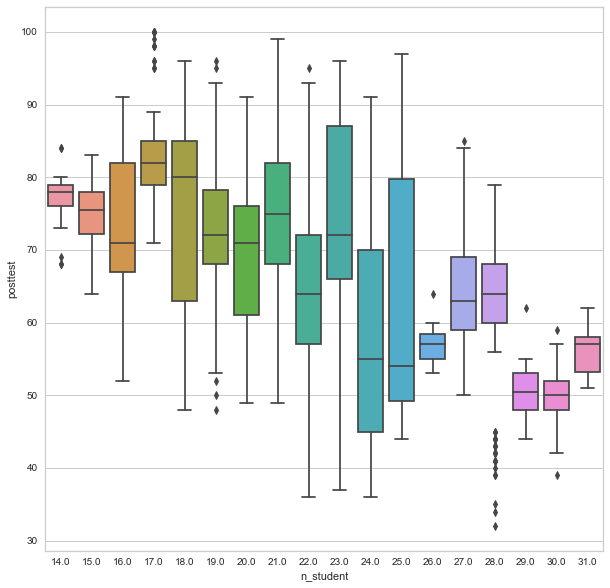

In [19]:
plt.figure(figsize=(10,10))
sns.boxplot(x = X_train.n_student, y = y_train)

It seems like the test score drop siginificantly as there are 24 or more students..I create a new column which takes value 1 when there are more than 23 students and value 0 otherwise 

In [20]:
X_train["number_students"] = X_train.n_student.apply(lambda x: 1 if x > 23 else 0)

In [21]:
X_train.student_id.value_counts

#doesn't look relevant knowing the student id

<bound method IndexOpsMixin.value_counts of 941     C2UIR
728     JX5I4
171     2BCEE
2031    KEX5T
2074    0FC2B
        ...  
582     K6QF7
1949    5SPC0
2044    0WLKR
487     3BUJG
569     0G5ME
Name: student_id, Length: 1706, dtype: object>

In [22]:
X_train.gender.value_counts()

Male      871
Female    835
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='posttest'>

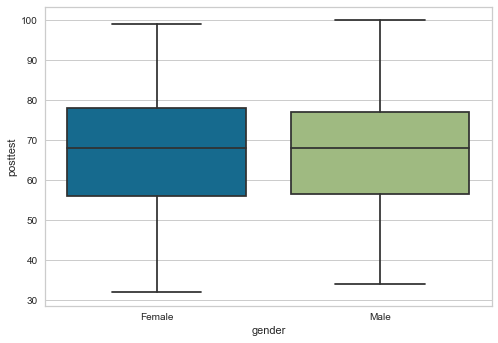

In [23]:
sns.boxplot(x = X_train.gender, y = y_train)

#knowing the gender doesn't seem to change the test score

In [24]:
X_train

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,number_students
941,KFZMY,Urban,Non-public,1VD,Experimental,27.0,C2UIR,Female,Does not qualify,45.0,1
728,GOOBU,Urban,Public,CXC,Standard,24.0,JX5I4,Female,Qualifies for reduced/free lunch,33.0,1
171,CIMBB,Urban,Non-public,EID,Standard,21.0,2BCEE,Female,Does not qualify,72.0,0
2031,ZOWMK,Urban,Public,CII,Standard,27.0,KEX5T,Female,Qualifies for reduced/free lunch,52.0,1
2074,ZOWMK,Urban,Public,QA2,Standard,30.0,0FC2B,Female,Does not qualify,43.0,1
...,...,...,...,...,...,...,...,...,...,...,...
582,GJJHK,Suburban,Public,YUC,Standard,21.0,K6QF7,Female,Qualifies for reduced/free lunch,42.0,0
1949,ZMNYA,Suburban,Public,1UU,Experimental,24.0,5SPC0,Female,Does not qualify,65.0,1
2044,ZOWMK,Urban,Public,Q0E,Experimental,30.0,0WLKR,Male,Qualifies for reduced/free lunch,25.0,1
487,FBUMG,Rural,Non-public,JGD,Experimental,14.0,3BUJG,Male,Does not qualify,58.0,0


In [25]:
X_train.lunch.value_counts()

Does not qualify                    968
Qualifies for reduced/free lunch    738
Name: lunch, dtype: int64

<AxesSubplot:xlabel='lunch', ylabel='posttest'>

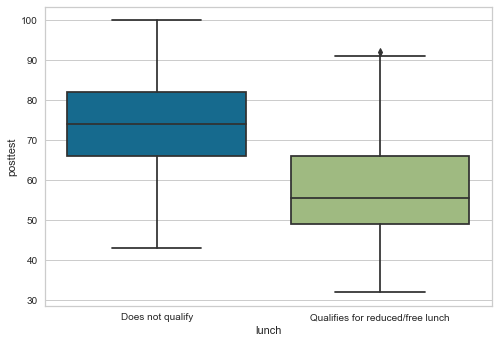

In [26]:
sns.boxplot(x = X_train.lunch, y = y_train)

#the lunch variable looks relevant... those who do not qualify for reduced/free lunch seem to have better scores

<AxesSubplot:xlabel='pretest', ylabel='posttest'>

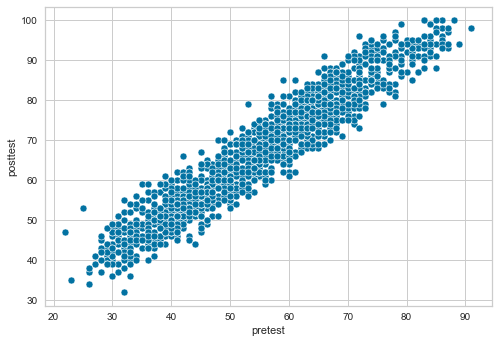

In [27]:
sns.scatterplot(x = X_train.pretest, y = y_train)

#there is a very strong correlation between the pre-test scores and the score at the final test

In [28]:
X_train.columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest', 'number_students'],
      dtype='object')

## SIMPLE LINEAR REGRESSION (1 PREDICTOR = PRETEST SCORE)

I will create first a model with the pretest variable only...I will try different algorithms and use the best result as a benchmark
Then I will try adding more features and see if they help improve the predictions accuracy

In [29]:
linear = LinearRegression()

In [30]:
df.dtypes

school              object
school_setting      object
school_type         object
classroom           object
teaching_method     object
n_student          float64
student_id          object
gender              object
lunch               object
pretest            float64
posttest           float64
dtype: object

In [31]:
X_train_linear, y_train_linear, X_test_linear, y_test_linear = train_test_split(df.pretest, df.posttest, test_size = 0.20 )

In [32]:
linear.fit(np.array(X_train.pretest).reshape(-1,1), y_train)

LinearRegression()

In [33]:
predictions_linear = linear.predict(np.array(X_test.pretest).reshape(-1,1))

In [34]:
mean_squared_error(y_test, predictions_linear)

#MSE

19.3242392013343

In [35]:
np.sqrt(mean_squared_error(y_test, predictions_linear))

#RMSE

4.395934394566678

In [36]:
mean_absolute_error(y_test, predictions_linear)

3.5665728039203235

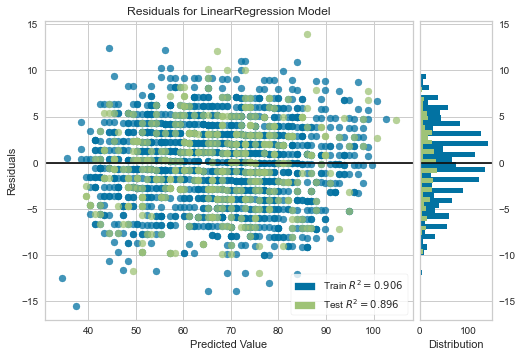

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [37]:
visualizer = ResidualsPlot(linear)

visualizer.fit(np.array(X_train.pretest).reshape(-1,1), y_train)  # Fit the training data to the visualizer
visualizer.score(np.array(X_test.pretest).reshape(-1,1), y_test)  # Evaluate the model on the test data
visualizer.show()     

These RMSE, MSE and MAE errors will be my benchmark

### SELECTING ONLY RELEVANT VARIABLES

In [38]:
X_train = X_train[['school', 'school_setting', 'school_type',
       'teaching_method','n_student', 'gender', 'lunch',
       'pretest']]

In [39]:
X_train

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest
941,KFZMY,Urban,Non-public,Experimental,27.0,Female,Does not qualify,45.0
728,GOOBU,Urban,Public,Standard,24.0,Female,Qualifies for reduced/free lunch,33.0
171,CIMBB,Urban,Non-public,Standard,21.0,Female,Does not qualify,72.0
2031,ZOWMK,Urban,Public,Standard,27.0,Female,Qualifies for reduced/free lunch,52.0
2074,ZOWMK,Urban,Public,Standard,30.0,Female,Does not qualify,43.0
...,...,...,...,...,...,...,...,...
582,GJJHK,Suburban,Public,Standard,21.0,Female,Qualifies for reduced/free lunch,42.0
1949,ZMNYA,Suburban,Public,Experimental,24.0,Female,Does not qualify,65.0
2044,ZOWMK,Urban,Public,Experimental,30.0,Male,Qualifies for reduced/free lunch,25.0
487,FBUMG,Rural,Non-public,Experimental,14.0,Male,Does not qualify,58.0


In [40]:
X_test["number_students"] = X_test.n_student.apply(lambda x: 1 if x > 23 else 0)

In [41]:
X_test = X_test[['school', 'school_setting', 'school_type',
       'teaching_method', 'n_student','gender', 'lunch',
       'pretest']]

In [42]:
X_test

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest
162,CIMBB,Urban,Non-public,Standard,19.0,Male,Does not qualify,61.0
441,DNQDD,Suburban,Public,Standard,27.0,Male,Qualifies for reduced/free lunch,57.0
831,GOOBU,Urban,Public,Experimental,26.0,Female,Qualifies for reduced/free lunch,40.0
721,GOOBU,Urban,Public,Standard,24.0,Female,Qualifies for reduced/free lunch,33.0
734,GOOBU,Urban,Public,Standard,24.0,Male,Qualifies for reduced/free lunch,29.0
...,...,...,...,...,...,...,...,...
805,GOOBU,Urban,Public,Standard,25.0,Male,Qualifies for reduced/free lunch,37.0
436,DNQDD,Suburban,Public,Standard,27.0,Female,Qualifies for reduced/free lunch,60.0
61,CCAAW,Suburban,Non-public,Experimental,20.0,Male,Does not qualify,66.0
1507,UKPGS,Suburban,Public,Standard,25.0,Male,Does not qualify,83.0


## KNN

In [43]:
mkt = make_column_transformer((OneHotEncoder(), ['school', 'school_setting', 'school_type',
       'teaching_method','gender', 'n_student','lunch']), remainder='passthrough')

In [44]:
knn = KNeighborsRegressor()
paramsKNN = {"kneighborsregressor__n_neighbors": [3,5,6,7,8,10,12], "kneighborsregressor__weights": ['uniform', 'distance'], "kneighborsregressor__p": [1,2]}

In [45]:
pipe_knn = make_pipeline(mkt, knn)

In [46]:
grid_knn = GridSearchCV(pipe_knn, param_grid = paramsKNN, cv = 5, scoring="neg_mean_absolute_error")

In [47]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['school',
                                                                          'school_setting',
                                                                          'school_type',
                                                                          'teaching_method',
                                                                          'gender',
                                                                          'n_student',
                                                                          'lunch'])])),
                                       (

In [48]:
grid_knn.best_score_

-2.412747737705293

In [49]:
grid_knn.best_params_

{'kneighborsregressor__n_neighbors': 6,
 'kneighborsregressor__p': 1,
 'kneighborsregressor__weights': 'uniform'}

In [50]:
y_pred_KNN = grid_knn.predict(X_test)
mean_absolute_error(y_test, y_pred_KNN)

#significant improvement compared to the simple linear regression

2.573380171740828

In [51]:
print(mean_squared_error(y_test, y_pred_KNN))
print(np.sqrt(mean_squared_error(y_test, y_pred_KNN)))

10.845238095238093
3.293210909619682


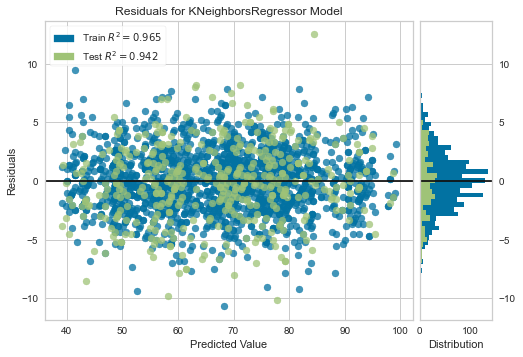

<AxesSubplot:title={'center':'Residuals for KNeighborsRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [52]:
model = grid_knn.best_estimator_
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## DECISION TREE

In [53]:
decTree = DecisionTreeRegressor()
paramsDecTree = {"decisiontreeregressor__criterion": ['mse', 'mae'], "decisiontreeregressor__max_depth": [2,3,4,5,6,7], "decisiontreeregressor__random_state": [3]}

In [54]:
pipe_decTree = make_pipeline(mkt, decTree)

In [55]:
grid_decTree = GridSearchCV(pipe_decTree, param_grid = paramsDecTree, cv = 5, scoring="neg_mean_absolute_error")

In [56]:
grid_decTree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['school',
                                                                          'school_setting',
                                                                          'school_type',
                                                                          'teaching_method',
                                                                          'gender',
                                                                          'n_student',
                                                                          'lunch'])])),
                                       (

In [57]:
grid_decTree.best_score_

-2.6535439282468145

In [58]:
grid_decTree.best_params_

{'decisiontreeregressor__criterion': 'mae',
 'decisiontreeregressor__max_depth': 5,
 'decisiontreeregressor__random_state': 3}

In [59]:
y_pred_decTree = grid_decTree.predict(X_test)
mean_absolute_error(y_test, y_pred_decTree)

#slightly worse than KNN

2.717798594847775

In [60]:
print(mean_squared_error(y_test, y_pred_decTree))
print(np.sqrt(mean_squared_error(y_test, y_pred_decTree)))

11.77927400468384
3.4320946963456356


In [61]:
text_representation = tree.export_text(grid_decTree.best_estimator_[1])
print(text_representation)

|--- feature_52 <= 54.50
|   |--- feature_52 <= 42.50
|   |   |--- feature_52 <= 33.50
|   |   |   |--- feature_28 <= 0.50
|   |   |   |   |--- feature_52 <= 26.50
|   |   |   |   |   |--- value: [36.00]
|   |   |   |   |--- feature_52 >  26.50
|   |   |   |   |   |--- value: [42.00]
|   |   |   |--- feature_28 >  0.50
|   |   |   |   |--- feature_22 <= 0.50
|   |   |   |   |   |--- value: [47.50]
|   |   |   |   |--- feature_22 >  0.50
|   |   |   |   |   |--- value: [53.50]
|   |   |--- feature_52 >  33.50
|   |   |   |--- feature_29 <= 0.50
|   |   |   |   |--- feature_48 <= 0.50
|   |   |   |   |   |--- value: [57.00]
|   |   |   |   |--- feature_48 >  0.50
|   |   |   |   |   |--- value: [52.00]
|   |   |   |--- feature_29 >  0.50
|   |   |   |   |--- feature_52 <= 37.50
|   |   |   |   |   |--- value: [46.00]
|   |   |   |   |--- feature_52 >  37.50
|   |   |   |   |   |--- value: [50.00]
|   |--- feature_52 >  42.50
|   |   |--- feature_52 <= 47.50
|   |   |   |--- feature_28 <=

## RANDOM FOREST

In [62]:
random = RandomForestRegressor()
paramsRandom = {"randomforestregressor__criterion": ['mse', 'mae'], "randomforestregressor__max_depth": [5,6], "randomforestregressor__n_estimators": [35], "randomforestregressor__random_state": [3]}

In [63]:
pipe_Random = make_pipeline(mkt, random)

In [64]:
grid_Random = GridSearchCV(pipe_Random, param_grid = paramsRandom, cv = 5, scoring="neg_mean_absolute_error")

In [65]:
grid_Random.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['school',
                                                                          'school_setting',
                                                                          'school_type',
                                                                          'teaching_method',
                                                                          'gender',
                                                                          'n_student',
                                                                          'lunch'])])),
                                       (

In [66]:
grid_Random.best_score_

-2.497635806860642

In [67]:
grid_Random.best_params_

{'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': 6,
 'randomforestregressor__n_estimators': 35,
 'randomforestregressor__random_state': 3}

In [68]:
y_pred_Random = grid_Random.predict(X_test)
mean_absolute_error(y_test, y_pred_Random)

#slightly worse than KNN

2.6059702912596494

In [69]:
print(mean_squared_error(y_test, y_pred_Random))
print(np.sqrt(mean_squared_error(y_test, y_pred_Random)))

10.714839265777865
3.2733529088348945


<BarContainer object of 53 artists>

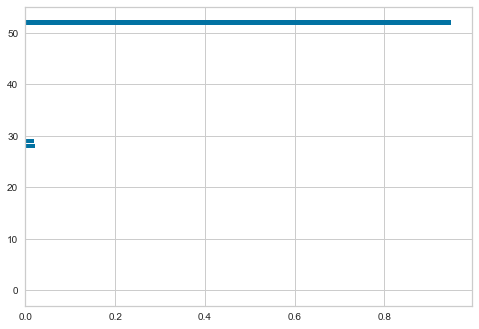

In [70]:
grid_Random.best_estimator_[1].feature_importances_
plt.barh(y = range(0,53), width = grid_Random.best_estimator_[1].feature_importances_)

## RIDGE

In [71]:
ridge = Ridge()
paramsRidge = {"ridge__alpha": [x for x in np.linspace(0, 2, num = 50)]}

In [72]:
pipe_Ridge = make_pipeline(mkt, ridge)

In [73]:
grid_Ridge = GridSearchCV(pipe_Ridge, param_grid = paramsRidge, cv = 5, scoring="neg_mean_absolute_error")

In [74]:
grid_Ridge.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['school',
                                                                          'school_setting',
                                                                          'school_type',
                                                                          'teaching_method',
                                                                          'gender',
                                                                          'n_student',
                                                                          'lunch'])])),
                                       (

In [75]:
grid_Ridge.best_score_

-2.5435288123991215

In [76]:
grid_Ridge.best_params_

{'ridge__alpha': 2.0}

In [77]:
y_pred_Ridge = grid_Ridge.predict(X_test)
mean_absolute_error(y_test, y_pred_Ridge)

#slightly worse than KNN

2.685804951842144

In [78]:
print(mean_squared_error(y_test, y_pred_Ridge))
print(np.sqrt(mean_squared_error(y_test, y_pred_Ridge)))

11.1240865439102
3.335279080363471


## LASSO

In [79]:
lasso = Lasso()
paramsLasso = {"lasso__alpha": [x for x in np.linspace(0, 2, num = 50)]}

In [80]:
pipe_Lasso = make_pipeline(mkt, lasso)

In [81]:
grid_Lasso = GridSearchCV(pipe_Lasso, param_grid = paramsLasso, cv = 5, scoring="neg_mean_absolute_error")

In [82]:
grid_Lasso.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['school',
                                                                          'school_setting',
                                                                          'school_type',
                                                                          'teaching_method',
                                                                          'gender',
                                                                          'n_student',
                                                                          'lunch'])])),
                                       (

In [83]:
grid_Lasso.best_score_

-2.500715537676891

In [84]:
grid_Lasso.best_params_

{'lasso__alpha': 0.0}

In [85]:
y_pred_Lasso = grid_Lasso.predict(X_test)
mean_absolute_error(y_test, y_pred_Lasso)

#slightly worse than KNN

2.571230324424948

In [86]:
print(mean_squared_error(y_test, y_pred_Lasso))
print(np.sqrt(mean_squared_error(y_test, y_pred_Lasso)))

10.007759287882243
3.1635042734098278


KNN seems to provide the best results